In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Walmart DataSet.csv')
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# EDA

* a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
* b. If the weekly sales show a seasonal trend, when and what could be the reason?
* c. Does temperature affect the weekly sales in any manner?
* d. How is the Consumer Price index affecting the weekly sales of various stores?
* e. Top performing stores according to the historical data.
* f. The worst performing store, and how significant is the difference between the highest and lowest performing stores

In [5]:
#a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

correlations = {}
for i in range(1, 46):
    store = data.loc[data['Store'] == i, ['Unemployment', 'Weekly_Sales']]
    correlations[i] = store.corr().iloc[0, 1]
sorted_correlations = sorted(correlations.items(), key = lambda x: x[1])
sorted_correlations

[(38, -0.7852902748572035),
 (44, -0.7800764432910213),
 (39, -0.38468135708616114),
 (42, -0.3563546441574803),
 (41, -0.35062960956345857),
 (4, -0.33701519564455934),
 (17, -0.26359968183073784),
 (3, -0.23041301348635052),
 (37, -0.22128669565468448),
 (5, -0.20704271031605845),
 (43, -0.2019543573720583),
 (9, -0.19153436370228277),
 (13, -0.17163286889635065),
 (7, -0.16538168270129372),
 (40, -0.1125279505881245),
 (32, -0.09945467124759037),
 (1, -0.09795539472957958),
 (20, -0.09534134450284601),
 (23, -0.07716899559088797),
 (16, -0.07086358405192228),
 (26, -0.06689910263473173),
 (31, -0.06473780907549004),
 (8, -0.05257964619712695),
 (11, -0.02033897113308286),
 (27, -0.014275051941261947),
 (24, -0.012260801238923046),
 (12, -0.009286099902746767),
 (25, -0.004957651760361023),
 (45, -0.004041028359857243),
 (34, 0.017010250652790097),
 (22, 0.03904286735534702),
 (6, 0.04425082101562253),
 (2, 0.06632485967770915),
 (15, 0.07890536860514374),
 (29, 0.08468168200648393),

Solution: Store 38 is most negatively correlated (-0.78) and Store 36 is most positively correlated (0.83).

<Axes: xlabel='Date'>

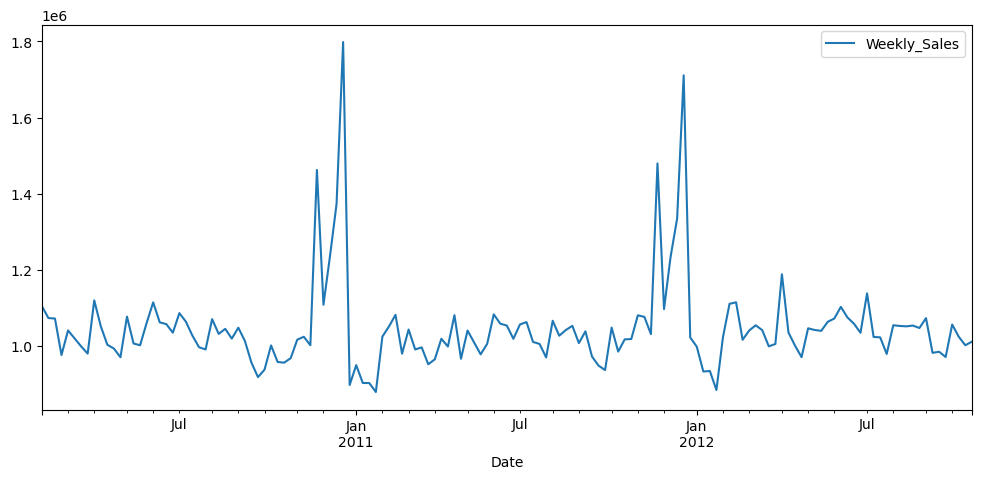

In [6]:
#b. If the weekly sales show a seasonal trend, when and what could be the reason?
data_by_date = data.groupby('Date').agg({'Weekly_Sales':'mean'})
data_by_date.plot(figsize = (12, 5))

Solution: In the above plot we can see that sales are INCREASED in the month of November and December, indicating seasonal trend. This may be due to Thanksgiving (November) and Christmas and New Year (December).

In [7]:
#c. Does temperature affect the weekly sales in any manner?

correlations = {}

for i in range(1, 46):
    store = data.loc[data['Store'] == i, ['Temperature', 'Weekly_Sales']]
    correlations[i] = store.corr().iloc[0, 1]
sorted_correlations = sorted(correlations.items(), key = lambda x: x[1])
sorted_correlations

[(10, -0.4325686888435955),
 (12, -0.3794156584992419),
 (3, -0.3775242935872093),
 (28, -0.37650606013576626),
 (30, -0.3308162961966215),
 (8, -0.3123237415376164),
 (37, -0.3004934224173782),
 (2, -0.29767311082802683),
 (34, -0.2785228198088513),
 (11, -0.2785027900200435),
 (20, -0.2649832854698796),
 (31, -0.26219191391866564),
 (4, -0.2255825417409479),
 (1, -0.22270055855381135),
 (9, -0.20834332242220094),
 (45, -0.20194545108496426),
 (14, -0.19985149165766852),
 (21, -0.1770843709418941),
 (5, -0.17551687386901346),
 (42, -0.1516389607705795),
 (18, -0.14427783500673388),
 (13, -0.13774557508715082),
 (29, -0.12914402773073824),
 (32, -0.11168119456366409),
 (36, -0.09445356540511145),
 (6, -0.08486307511582583),
 (22, -0.0828919051589471),
 (19, -0.08080507852114378),
 (15, -0.05054134053647494),
 (25, -0.03131115034697724),
 (7, 0.01507746259919463),
 (33, 0.019244147874133904),
 (38, 0.032993193680831534),
 (35, 0.043391731080348675),
 (23, 0.05625736322525011),
 (39, 0.0

Solution: Correlation of weekly sales and temperature across various stores is WEAK to MODERATE with maximum correlation of -0.43 in Store 10.

In [8]:
#d. How is the Consumer Price index affecting the weekly sales of various stores?
correlations = {}
for i in range(1, 46):
    store = data.loc[data['Store'] == i, ['CPI', 'Weekly_Sales']]
    correlations[i] = store.corr(numeric_only = True).iloc[0, 1]
sorted_correlations = sorted(correlations.items(), key = lambda x: x[1])
sorted_correlations

[(36, -0.9150952776725539),
 (35, -0.4241071564963804),
 (14, -0.41975479220452866),
 (30, -0.29818804760655215),
 (43, -0.28568626698243715),
 (27, -0.2130823204696791),
 (18, -0.19354111699294052),
 (15, -0.17446747668440019),
 (21, -0.163648770126279),
 (19, -0.15534107232709649),
 (10, -0.11537417240215449),
 (28, -0.09590808342001089),
 (29, -0.07253033622918227),
 (2, -0.062431070670076715),
 (33, -0.05227128201719328),
 (22, -0.03860228673099033),
 (45, -0.023547620418580665),
 (24, -0.013684306211755204),
 (6, -0.01135748463953503),
 (25, -0.010914330648432478),
 (20, 0.058705882245852305),
 (11, 0.06978058146346261),
 (12, 0.0840866724257402),
 (23, 0.08424798940104437),
 (40, 0.11331786747501114),
 (34, 0.11543730980118828),
 (8, 0.12025523036098991),
 (16, 0.1242845775937291),
 (26, 0.13197951444431066),
 (31, 0.13288658242840257),
 (13, 0.16397584057555697),
 (32, 0.19678204967738638),
 (1, 0.22540765942904353),
 (37, 0.24450653322669214),
 (7, 0.2890443774932085),
 (9, 0.2

Solution: Store 36 is most negatively correlated (-0.91) and Store 38 is most positively correlated (0.81).

<Axes: xlabel='Store'>

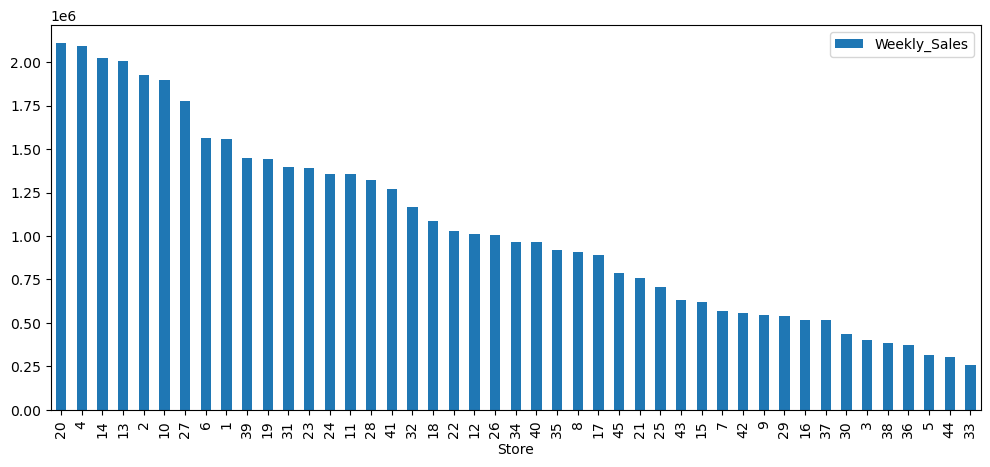

In [9]:
#e. Top performing stores according to the historical data.
data.groupby('Store').agg({'Weekly_Sales':'mean'}).sort_values('Weekly_Sales', ascending = False).plot.bar(figsize = (12, 5))

Solution: As per the data, top performing store is Store 20 followed by Stores 4, 14, and 13.

In [10]:
#f. The worst performing store, and how significant is the difference between the highest and lowest performing stores
data.groupby('Store').agg({'Weekly_Sales':'mean'}).sort_values('Weekly_Sales', ascending = False).round(2)

,Weekly_Sales
Store,
20,2107676.87
4,2094712.96
14,2020978.40
13,2003620.31
2,1925751.34
10,1899424.57
27,1775216.20
6,1564728.19
1,1555264.40


Top performing store: 20 | Average sales: 2,107,676.87
Worst performing store: 33 | Average sales: 259,861.69
Difference = 2,107,676.87 - 259,861.69 = 1,847,815.18

# Predictive Analysis

In [11]:
#Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

from prophet import Prophet

forecast_df = pd.DataFrame()
for i in range(1, 46):
    store = data.loc[data['Store'] == 1, ['Date', 'Weekly_Sales']]
    store.columns = ['ds', 'y']
    model = Prophet(weekly_seasonality = True)
    model.fit(store)
    future = model.make_future_dataframe(periods = 12, freq = 'W')
    forecast = model.predict(future)    
    store_forecast = forecast.loc[143:, ['ds', 'yhat']]
    store_forecast.columns = ['ds', f'store{i}']
    store_forecast[f'store{i}'] = store_forecast[f'store{i}'].round(2)
    forecast_df = pd.concat([forecast_df, store_forecast[f'store{i}']], axis=1)
    
forecast_df = pd.concat([future.iloc[-12:], forecast_df], axis = 1).reset_index(drop = True)
forecast_df

,ds,store1,store2,store3,store4,store5,store6,store7,store8,store9,...,store36,store37,store38,store39,store40,store41,store42,store43,store44,store45
0,2012-10-28,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,...,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79,1673723.79
1,2012-11-04,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,...,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31,1740037.31
2,2012-11-11,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,...,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89,1830311.89
3,2012-11-18,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,...,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35,1887422.35
4,2012-11-25,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,...,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77,1908515.77
5,2012-12-02,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,...,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43,1951051.43
6,2012-12-09,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,...,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99,2054139.99
7,2012-12-16,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,...,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93,2164715.93
8,2012-12-23,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,...,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10,2166319.10
9,2012-12-30,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,...,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62,1996405.62
